# Multiple Linear Regression

## Step 1: Import packages and classes

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

## Step 2: Provide data

The dataset for this example is available at:
https://drive.google.com/open?id=1mVmGNx6cbfvRHC_DvF12ZL3wGLSHD9f_

In [3]:
ds = pd.read_csv('C:/Users/Rekidiang/Desktop/M-Learning-rkd/datas_rkd/petrol_consumption.csv')

## Step 3: Data exploration and Data Visualization

In [4]:
ds.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [5]:
ds.shape

(48, 5)

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [8]:
ds.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


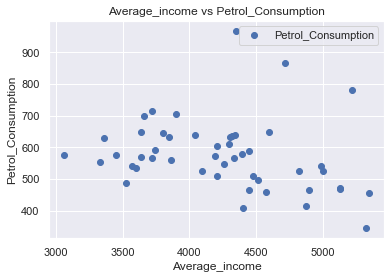

In [11]:
ds.plot(x='Average_income', y='Petrol_Consumption', style='o')
plt.title('Average_income vs Petrol_Consumption')
plt.xlabel('Average_income')
plt.ylabel('Petrol_Consumption')
plt.show()


## Step 4: Data Preparation

In [12]:
# divide the data into "attributes" and "labels"

X = ds[['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)']]
y = ds['Petrol_Consumption']

In [13]:
# split this data into training and test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Step 5 : Model Training

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Step 6 : Model Evaluation

In [15]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


> This means that for a unit increase in "petrol_tax", there is a decrease of 24.19 million gallons in gas consumption. Similarly, a unit increase in proportion of population with a drivers license results in an increase of 1.324 billion gallons of gas consumption. We can see that "Average_income" and "Paved_Highways" have a very little effect on the gas consumption.

In [16]:
print("Model slope:    ", regressor.coef_[0])
print("Model intercept:", regressor.intercept_)

Model slope:     -40.016660156506056
Model intercept: 425.5993322032417


## Step 7 :Prediction

In [17]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


## Step 8 : Compare trained and Predicted Results

In [19]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 56.822247478964684
Mean Squared Error: 4666.3447875883585
Root Mean Squared Error: 68.31064915215165


> You can see that the value of root mean squared error is 60.07, which is slightly greater than 10% of the mean value of the gas consumption in all states. This means that our algorithm was not very accurate but can still make reasonably good predictions.

### There are many factors that may have contributed to this inaccuracy, a few of which are listed here:

> 1. Need more data: Only one year worth of data isn't that much, whereas having multiple years worth could have helped us improve the accuracy quite a bit.
> 1. Bad assumptions: We made the assumption that this data has a linear relationship, but that might not be the case. Visualizing the data may help you determine that.
> 1. Poor features: The features we used may not have had a high enough correlation to the values we were trying to predict.

## ## Step 9 : Improve the Model

There are a few things you can do from here:

> * Play around with the code and data in this article to see if you can improve the results (try changing the training/test size, transform/scale input features, etc.)
> * Seek out some more complete resources on machine learning techniques, like the Deep Learning A-Z: Hands-On Artificial Neural Networks and Python for Data Science and Machine Learning Bootcamp courses, which will also teach you how to use Scikit-Learn and other popular ML libraries
> * Download and play with some other regression datasets to see what kind of results you can get out of those. The more experience the better!

> **Sources :**
    > * https://stackabuse.com/linear-regression-in-python-with-scikit-learn/